# Implementando SVM para Dados Sintéticos

### Importando as bibliotecas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
%matplotlib inline

### Importando os Dados

In [7]:
DATAPATH_1 = ('ex6data1.mat')
DATAPATH_2 = ('ex6data2.mat')
DATAPATH_3 = ('ex6data3.mat')

### Definindo uma Função para Plotar os Dados

In [8]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (14., 8.)
    
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)

### Split dos Dados 

In [9]:
data1 = loadmat(DATAPATH_1)

X = data1['X']
y = data1['y']

### Plotando os Dados em um Plano Cartesiano

Inicio com dados simplificados com um limite linear claro entre os dados para treinamento.

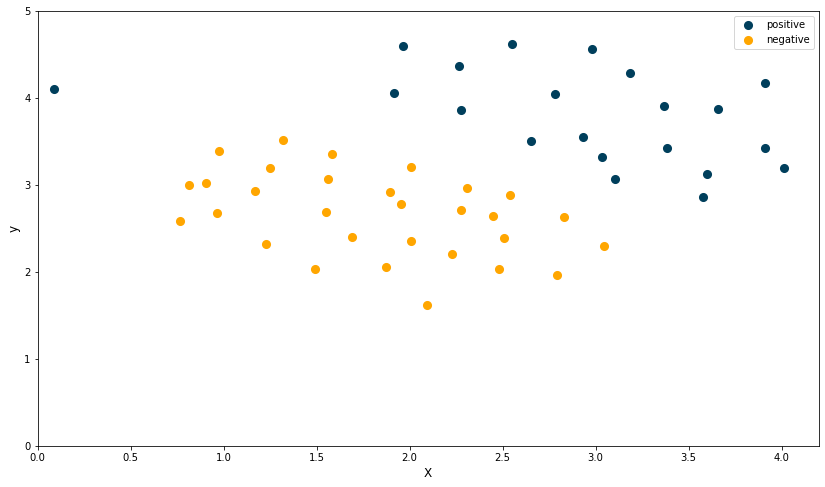

In [10]:
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

### Aplicando SVM com Regularização Pequena (C=1)

Implementação do SVM de maneria otimizada conforme documentação oficial __[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)__. Para esta classificação, será utilizado o Kernel linear básico, parametrizado no algoritmo, uma vez que o default é o 'rbf' (Radial Basis Function).

### Aplicando SVM com Regularização Grande (C=100)

Alterando o limite de decisão para 100, o modelo vai para um Overfit sobre os dados de treinamento. 

### Superfície de Separação não Linear

A seguir, veremos um conjunto de dados que não pôde ser linearmente separável. Aqui é onde os kernels entram em cena para fornecer a funcionalidade de um classificador não linear. Para mais detalhes sobre o conceito de Kernels, acesse o artigo [Understanding the kernel trick](https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78) para uma compreensão da intuição matemática. 

### Implementando SVM com Kernel Gaussiano

Para esta parte da tarefa, foi solicitado a utilização da função gaussianKernel para auxiliar na implementação do SVM com kernels gaussianos. O SVC contém sua própria implementação de kernel gaussiano na forma de função de base radial (rbf). Para uma descriçao da função 'rbf' acesse o artigo [Radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel).

\begin{equation*}
K_{gaussian} (x^{(i)},x^{(j)}) = exp \left( - \frac{\parallel x^{(i)} - x^{(j)} \parallel^2}{ 2 \sigma^2 } \right) = exp \left( - \frac{\sum_{k=1}^{n} (x_k^{(i)} - x_k^{(i)})^2}{2 \sigma^2} \right)
\end{equation*}

---------------
# Prática Regressão Logística e KNN


## Exemplo Brest Cancer - Let's save some lives

Na aula de hoje, vamos trabalhar com o Breast Cancer Dataset. Ao invés de fazer o download, vamos aproveitar o módulo datasets do scikit! Esse dataset contém 30 atributos e 2 possíveis outcomes: M (Malign) ou B (Benign). Nossa tarefa será, a partir dos features, conseguir prever o tipo de tumor de cada paciente. Vamos primeiro fazer o loading do dataset:


## Importando as bibliotecas

## Carregando e verificando os dados

Use as células abaixo para explorar o dataset. Recomendo usar os atributos `.feature_names`, `.target_names` e `.data.shape` para ter um entendimento complementar do dataset além dos métodos exploratórios que ja vimos (`.info()`, `.head()`, `.describe()`. Para utilizar os métodos exploratórios, precisaremos converter nossos dados para um *Pandas DataFrame*. Para isso, utilize `pd.DataFrame.from_dict()`...mas na real que não é necessário nessa aula.

## Separando os dados em treino e teste

Ok, agora precisamos realizar o `train_test_split` dos nossos dados, uma vez que voltamos a realizar aprendizado supervisionado. Vamos fazer um split 80-20. Recomendo utilizar as aulas anteriores para isso! Na célula abaixo, realize o train-test-split criando 4 variáveis: X_train, X_test, y_train, y_test. Para reproducibilidade, vamos no tradicional random_state de 42, já que é a resposta para tudo, e com test_size = 0.2. Para documentação oficial clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## Rodando o classificador de Machine Learning - Regressão Logística

Com nosso dados de treino e test, estamos prontos para aplicar nossos métodos de classificação! Vamos implementar uma logística e observar os resultados segundo as métricas que discutimos mais acima. Utiliza os parâmetros `dual` com False e `max_iter` com 5000 para evitar erros de convergência. Para documentação oficial clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Medindo os resultados

Legal, montamos nosso modelo de regressão logística. Vamos montar a matriz de confusão dados os outputs do modelo e nossos targets. Para tal, importe o módulo `metrics` do scikit e crie uma variável cnf_matrix que recebe `metrics.confusion_matrix()`. Essa classe __[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)__ recebe 2 argumentos: `y_test` e `y_pred`. Por fim, faça o `print()` da matriz!

Parece então que temos 39 TN, 4 FP, 1 FN e 70 TP. Vamos puxar as métricas accuracy, precision e recall chamando os respectivos métodos de `metrics`. Eles são `.accuracy_score()`, `.precision_score()` e `.recall_score()`. Todos eles recebem 2 argumentos: y_test e y_pred. Faça o print das 3 métricas. Para documentação oficial acesse [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Para saber como aplicar as métricas acesse [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

Olha só! Parece que fizemos um modelo muito bom para prever o perfil do câncer de mama dos datapoints observados! Nossas 3 métricas estão top-notch, todas acima de 90%. Essa é a maneira artesanal de fazer um classificador. Vamos para algo mais emocionante.



## Rodando o classificador de Machine Learning - KNN

Vamos agora implemntar o KNN. Para acesso a documentação oficial [clique aqui](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## aplicando o KNN nos dados de treino

## aplicando o KNN para dados de teste


----------------

# Exemplo Diabetes - Let's save some lives again

Para esse exercício, usaremos o __[dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)__ de diabetes Pima Indians. 

## Lendo e verificando os dados

## Verificando o balanceamento da variável target

Parece que temos 1 para casos positivos de diabetes e 0 para casos negativos. Na célula abaixo, vamos realizar um `.groupby()` em label seguido de um `.count()` para checar se nosso dataset está balanceado.

## Dividindo os dados em treino e teste

Ok, ele não está balanceado 50-50, mas pelo menos ele não está ordens de grandeza desbalanceado. Vamos seguir como ele está, observar os resultados e então decidir se vale a pena balancea-lo ou aplicar outras transformações. Abaixo, realize o train-test-split da mesma forma que o exercício anterior:

## Split dos Dados

Agora implemente o split de dados conforme a documentação oficial do [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), com test_size = 0.2 e random_state = 42

## Rodando o classificador básico e medindo os resultados

Vamos aplicar a Regressão logística da mesma maneira. Ao final da construção das predictions, já chame as 3 métricas básicas de classificação binária! Utiliza os mesmos códigos já aplicados anteriormente, com os hiperparâmentros da regressão logística `dual` com False e `max_iter` com 5000.

## Plotando a curva ROC

Ok, dessa vez nossos resultados não deram tão certo...será que a regressão logística está realizando seu trabalho? Podemos observar isso pelo plot da curva ROC:

------------

# Rodando outros classificadores de Machine Learning

É....os resultados estão "meh". Uma coisa que podemos fazer é resolver esse problema na força bruta: puxar um monte de modelos, testar no nosso dataset e ver o que se sai melhor. Isso parece meio burro, mas realmente fazemos isso no nosso dia-a-dia: por que testar um modelo se podemos testar vários ao mesmo tempo?

OBS: Estamos avaliando as métricas em um único threshold!! Perigoso, não?
Geralmente eu escolho o top 3 modelos que minimizaram bem a Log Loss ou AUC e então, após otimizar bem seus hiperparâmetros (K do Knn, C do SVM, por exemplo), fazemos o estudo do threshold.


Logo mais teremos uma aula para falar sobre escolha de threshold!

Será que se os dados fossem balanceados o modelo aprenderia melhor??